<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Обзор данных</strong></a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Масштабирование-количественных-признаков." data-toc-modified-id="Масштабирование-количественных-признаков.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабирование количественных признаков.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Линейная-модель" data-toc-modified-id="Линейная-модель-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Линейная модель</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Взвешенные-весы" data-toc-modified-id="Взвешенные-весы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Взвешенные весы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Дополнительная-оптимизация" data-toc-modified-id="Дополнительная-оптимизация-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Дополнительная оптимизация</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Итоги-тестирования:" data-toc-modified-id="Итоги-тестирования:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итоги тестирования:</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, recall_score, precision_score,\
                            f1_score, precision_recall_curve, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

### **Обзор данных**

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

display(data.head(5))
display(data.info())
display(data.describe().T) # Информация о количественных данных
display(data.describe(include='object').T) # Информация о категориальных данных
print('Количество дубликатов:', data.duplicated().sum(), '\n')

# Вывели доли значений в категориальных параметрах
objects = data.select_dtypes(include='object').columns
print(objects)
for i in objects:
    print(str(i))
    display(data[i].value_counts())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Количество дубликатов: 0 

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Surname


Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Bancks       1
McEncroe     1
Greeves      1
Wilding      1
Mbanefo      1
Name: Surname, Length: 2932, dtype: int64

Geography


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender


Male      5457
Female    4543
Name: Gender, dtype: int64

**Выводы про обзору:**

- Есть пропуски в столбце `Tenure` - предстоит решить эту проблему.
- Столбец `Surname` - фамилия, не несёт полезной информации для модели, а количество значений в столбце `Surname` составляет 2932, поэтому кодировать этот столбец будет проблематично, вероятно от него предстоит избавиться полностью.
- Числа в столбцах `RowNumber` и `CustomerId` также не несут существенной информации для нашей задачи: `RowNumber` - номер строки, дублирует индексы, `CustomerId` - уникальный id, т.е. никак не сможет помочь обучиться модели. От этих столбцов тоже предстоит избавиться.

### Предобработка данных

Для улучшения качества данных заполнили имеющиеся пропуски и удалили ненужные столбцы.
Так же применили прямое кодирование для категориалных признаков:

In [ ]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype('int64')
data['Tenure'].isna().sum()

0

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Разделение на выборки

Выделили из выборки целевой признак и нецелевые.

Целевой признак:
- `Exited` - факт узоха клиента

Нецелевые признаки:
- `CreditScore` - кредитный рейтинг
- `Geography` - страна проживания (закодировано через OHE)
- `Gender` - пол
- `Age` - возраст
- `Tenure` - сколько лет человек является клиентом банка
- `Balance` - баланс на счёте
- `NumOfProducts` - количество продуктов банка, используемых клиентом
- `HasCrCard` - наличие кредитной карты
- `IsActiveMember` - активность клиента
- `EstimatedSalary` - предполагаемая зарплата

Разделили данные на обучающую, валидационную и тестовую выборки:


In [ ]:
y = data_ohe['Exited']
X = data_ohe.drop('Exited', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.4, random_state=52, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=.5, random_state=52, stratify=y_valid)
print(X_train.shape, X_valid.shape, X_test.shape)


(6000, 11) (2000, 11) (2000, 11)


### Масштабирование количественных признаков.

In [ ]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

display(X_train[numeric].head())

,CreditScore,Age,Tenure,Balance,EstimatedSalary
9220,-0.538279,2.004708,-0.362101,-1.234816,1.664266
5425,-0.067457,0.475843,1.081730,0.461368,0.819539
7023,-1.295688,-0.957468,1.442688,1.073541,-1.191681
754,1.918183,-0.001927,-0.001143,1.432644,-1.498265
3432,1.426890,-1.244130,-0.001143,-1.234816,-1.390840


### Вывод

- Подробно познакомились с данными
- Заполнили пропуски и удалили ненужные столбцы
- Применили прямое кодирование для категориальных
- Разделили данные на обучающую, валидационную и тестовую выборки.
- Промасштабировали количественные признаки.

## Исследование задачи

Проверили на баланс классов целевой признак `Exited`:

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Очевидно, в данных присутствует дисбаланс классов, соотношение примерно классов 4:1.

Обучили модели не учитывая дисбаланс классов.
Использовали три вида моделей: Линейную, Дерево решений и Случайный лес.
Подберали гиперпараметры и посмотрим на метрики на выходе:

In [ ]:
# Написали функцию для расчёта и вывода метрик:
def print_metrics(target_valid, prediction, model, features_valid):
    print('Полнота:',recall_score(target_valid, prediction))
    print('Точность:',precision_score(target_valid, prediction))
    print('F1-мера:',f1_score(target_valid, prediction))
    prob_valid = model.predict_proba(features_valid)[:,1]
    print('AUC-ROC:',roc_auc_score(target_valid, prob_valid))

### Линейная модель

In [ ]:
linear_model = LogisticRegression(random_state=52, solver='liblinear')
linear_model.fit(X_train, y_train)
linear_predicted_valid = linear_model.predict(X_valid)
print_metrics(y_valid, linear_predicted_valid, linear_model, X_valid)

Полнота: 0.20884520884520885
Точность: 0.6439393939393939
F1-мера: 0.31539888682745826
AUC-ROC: 0.7727095354213999


### Дерево решений

В отличии от модели логистической регресси для Дерева решений необходимо найти оптимальные гиперпараметры:

In [ ]:
best_depth = 0
best_f1 = 0
for depth in range(1,26):
    tree_model = DecisionTreeClassifier(random_state=52, max_depth=depth)
    tree_model.fit(X_train, y_train)
    tree_predicted_valid = tree_model.predict(X_valid)
    f1 = f1_score(y_valid, tree_predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print(f'Лучшая глубина - {best_depth}')

Лучшая глубина - 7


In [ ]:
tree_model = DecisionTreeClassifier(random_state=52, max_depth=7)
tree_model.fit(X_train, y_train)
tree_predicted_valid = tree_model.predict(X_valid)
print_metrics(y_valid, tree_predicted_valid, tree_model, X_valid)

Полнота: 0.5135135135135135
Точность: 0.6989966555183946
F1-мера: 0.5920679886685553
AUC-ROC: 0.8272185899304542


### Случайный лес

В отличии от модели логистической регресси для Случайного леса необходимо найти оптимальные гиперпараметры:

In [ ]:
best_est = 0
best_depth = 0
best_f1 = 0
for est in range(51,60,2):
    for depth in range(5,26,2):
        forest_model = RandomForestClassifier(random_state=52, max_depth=depth, n_estimators=est)
        forest_model.fit(X_train, y_train)
        forest_predicted_valid = forest_model.predict(X_valid)
        f1 = f1_score(y_valid, forest_predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
print(f'Лучшая глубина - {best_depth}, лучшее количество деревьев - {best_est}')
print(f'Лучшая f1 {best_f1}')

Лучшая глубина - 13, лучшее количество деревьев - 51
Лучшая f1 0.5614035087719298


In [ ]:
forest_model = RandomForestClassifier(random_state=52, max_depth=19, n_estimators=57)
forest_model.fit(X_train, y_train)
forest_predicted_valid = forest_model.predict(X_valid)
print_metrics(y_valid, forest_predicted_valid, forest_model, X_valid)

Полнота: 0.42997542997543
Точность: 0.7777777777777778
F1-мера: 0.5537974683544304
AUC-ROC: 0.8483768822751874


### Вывод
Модели обученные без учёта дисбаланса классов показали следующие результаты:

- Для Линейной модели F1-мера: 0.31539888682745826
    - сильно меньшее требуемого порога в 0.59
    
    
- Для Дерева решений F1-мера: 0.5920679886685553 (Глубина = 7)
    - достигает необходимого порога в 0.59
    
    
- Для Случайного леса F1-мера: 0.5537974683544304 (Глубина = 13, Количество деревьев = 51)
    - близкое к нужному порогу в 0.59


## Борьба с дисбалансом

Решили проблему дисбаланса применив взвешивание классов, увеличение и уменьшение выборки.
Проверили как эти решения повляли на значения метрик:

### Увеличение выборки

Написали функцию для увеличения класса '1' в выборке и применили её:

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=52)

    return features_upsampled, target_upsampled

In [ ]:
up_X_train, up_y_train = upsample(X_train, y_train, 4)
print(y_train[y_train==1].shape,up_y_train[y_train==1].shape)

(1222,) (4888,)


In [ ]:
# Проверили метрики Линейной модели на увеличенной выборке
linear_model = LogisticRegression(random_state=52, solver='liblinear')
linear_model.fit(up_X_train, up_y_train)
linear_predicted_valid = linear_model.predict(X_valid)
print('Показатели Линейной модели после увеличения выборки:')
print_metrics(y_valid, linear_predicted_valid, linear_model, X_valid)

# Проверили метрики Дерева решений на увеличенной выборке
best_depth = 0
best_f1 = 0
for depth in range(1,26):
    tree_model = DecisionTreeClassifier(random_state=52, max_depth=depth)
    tree_model.fit(up_X_train, up_y_train)
    tree_predicted_valid = tree_model.predict(X_valid)
    f1 = f1_score(y_valid, tree_predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Лучшая глубина:', best_depth)
tree_model = DecisionTreeClassifier(random_state=52, max_depth=best_depth)
tree_model.fit(up_X_train, up_y_train)
tree_predicted_valid = tree_model.predict(X_valid)
print('Показатели модели Дерева решений после увеличения выборки:')
print_metrics(y_valid, tree_predicted_valid, tree_model, X_valid)

# Проверили метрики Случайного леса на увеличенной выборке
best_est = 0
best_depth = 0
best_f1 = 0
for est in range(5,76,5):
    for depth in range(10,27,2):
        forest_model = RandomForestClassifier(random_state=52, max_depth=depth, n_estimators=est)
        forest_model.fit(up_X_train, up_y_train)
        forest_predicted_valid = forest_model.predict(X_valid)
        f1 = f1_score(y_valid, forest_predicted_valid)
        #print(est, depth, f1, best_f1)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est

print('Лучшая глубина:', best_depth, 'Лучшее количество деревьев:', best_est)
forest_model = RandomForestClassifier(random_state=52, max_depth=best_depth, n_estimators=best_est)
forest_model.fit(up_X_train, up_y_train)
forest_predicted_valid = forest_model.predict(X_valid)
print('Показатели модели Случайного леса после увеличения выборки:')
print_metrics(y_valid, forest_predicted_valid, forest_model, X_valid)

Показатели Линейной модели после увеличения выборки:
Полнота: 0.6781326781326781
Точность: 0.3881856540084388
F1-мера: 0.49373881932021463
AUC-ROC: 0.7735640108521464
Лучшая глубина: 7
Показатели модели Дерева решений после увеличения выборки:
Полнота: 0.6928746928746928
Точность: 0.4964788732394366
F1-мера: 0.5784615384615385
AUC-ROC: 0.8235708744183321
Лучшая глубина: 12 Лучшее количество деревьев: 40
Показатели модели Случайного леса после увеличения выборки:
Полнота: 0.6167076167076168
Точность: 0.6121951219512195
F1-мера: 0.6144430844553245
AUC-ROC: 0.8559252627049239


### Уменьшение выборки

Написали функцию для уменьшения класса '0' в выборке и применили её:



In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=52)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=52)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=52)

    return features_downsampled, target_downsampled

In [ ]:
down_X_train, down_y_train = downsample(X_train, y_train, 0.25)
print(y_train.value_counts(normalize=True))
print(down_y_train.value_counts(normalize=True))

0    0.796333
1    0.203667
Name: Exited, dtype: float64
1    0.505795
0    0.494205
Name: Exited, dtype: float64


In [ ]:
# Проверили метрики Линейной модели на уменьшенной выборке
linear_model = LogisticRegression(random_state=52, solver='liblinear')
linear_model.fit(down_X_train, down_y_train)
linear_predicted_valid = linear_model.predict(X_valid)
print('Показатели Линейной модели после уменьшения выборки:')
print_metrics(y_valid, linear_predicted_valid, linear_model, X_valid)

# Проверили метрики Дерева решений на уменьшенной выборке
best_depth = 0
best_f1 = 0
for depth in range(1,26):
    tree_model = DecisionTreeClassifier(random_state=52, max_depth=depth)
    tree_model.fit(down_X_train, down_y_train)
    tree_predicted_valid = tree_model.predict(X_valid)
    f1 = f1_score(y_valid, tree_predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Лучшая глубина:', best_depth)
tree_model = DecisionTreeClassifier(random_state=52, max_depth=best_depth)
tree_model.fit(down_X_train, down_y_train)
tree_predicted_valid = tree_model.predict(X_valid)
print('Показатели модели Дерева решений после уменьшения выборки:')
print_metrics(y_valid, tree_predicted_valid, tree_model, X_valid)

# Проверили метрики Случайного леса на уменьшенной выборке
best_est = 0
best_depth = 0
best_f1 = 0
for est in range(5,76,5):
    for depth in range(10,27,2):
        forest_model = RandomForestClassifier(random_state=52, max_depth=depth, n_estimators=est)
        forest_model.fit(down_X_train, down_y_train)
        forest_predicted_valid = forest_model.predict(X_valid)
        f1 = f1_score(y_valid, forest_predicted_valid)
        #print(est, depth, f1, best_f1)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est

print('Лучшая глубина:', best_depth, 'Лучшее количество деревьев:', best_est)
forest_model = RandomForestClassifier(random_state=52, max_depth=best_depth, n_estimators=best_est)
forest_model.fit(down_X_train, down_y_train)
forest_predicted_valid = forest_model.predict(X_valid)
print('Показатели модели Случайного леса после уменьшения выборки:')
print_metrics(y_valid, forest_predicted_valid, forest_model, X_valid)

Показатели Линейной модели после уменьшения выборки:
Полнота: 0.6928746928746928
Точность: 0.39058171745152354
F1-мера: 0.4995571302037201
AUC-ROC: 0.7755737247262672
Лучшая глубина: 5
Показатели модели Дерева решений после уменьшения выборки:
Полнота: 0.7248157248157249
Точность: 0.45245398773006135
F1-мера: 0.5571293673276676
AUC-ROC: 0.8070150273540102
Лучшая глубина: 14 Лучшее количество деревьев: 50
Показатели модели Случайного леса после уменьшения выборки:
Полнота: 0.7567567567567568
Точность: 0.48580441640378547
F1-мера: 0.5917387127761768
AUC-ROC: 0.8515071311681481


### Взвешенные весы

In [ ]:
# Проверили метрики Линейной модели со взвешенными весами
linear_model = LogisticRegression(random_state=52, solver='liblinear', class_weight='balanced')
linear_model.fit(X_train, y_train)
linear_predicted_valid = linear_model.predict(X_valid)
print('Показатели Линейной модели со взвешенными весами:')
print_metrics(y_valid, linear_predicted_valid, linear_model, X_valid)

# Проверили метрики Дерева решений со взвешенными весами
best_depth = 0
best_f1 = 0
for depth in range(1,26):
    tree_model = DecisionTreeClassifier(random_state=52, max_depth=depth, class_weight='balanced')
    tree_model.fit(X_train, y_train)
    tree_predicted_valid = tree_model.predict(X_valid)
    f1 = f1_score(y_valid, tree_predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Лучшая глубина:', best_depth)
tree_model = DecisionTreeClassifier(random_state=52, max_depth=best_depth, class_weight='balanced')
tree_model.fit(X_train, y_train)
tree_predicted_valid = tree_model.predict(X_valid)
print('Показатели модели Дерева решений со взвешенными весами:')
print_metrics(y_valid, tree_predicted_valid, tree_model, X_valid)

# Проверили метрики Случайного леса со взвешенными весами
best_est = 0
best_depth = 0
best_f1 = 0
for est in range(5,76,5):
    for depth in range(10,27,2):
        forest_model = RandomForestClassifier(random_state=52, max_depth=depth, n_estimators=est, class_weight='balanced')
        forest_model.fit(X_train, y_train)
        forest_predicted_valid = forest_model.predict(X_valid)
        f1 = f1_score(y_valid, forest_predicted_valid)
        #print(est, depth, f1, best_f1)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est

print('Лучшая глубина:', best_depth, 'Лучшее количество деревьев:', best_est)
forest_model = RandomForestClassifier(random_state=52, max_depth=best_depth, n_estimators=best_est, class_weight='balanced')
forest_model.fit(X_train, y_train)
forest_predicted_valid = forest_model.predict(X_valid)
print('Показатели модели Случайного леса со взвешенными весами:')
print_metrics(y_valid, forest_predicted_valid, forest_model, X_valid)

Показатели Линейной модели со взвешенными весами:
Полнота: 0.6707616707616708
Точность: 0.39280575539568346
F1-мера: 0.4954627949183304
AUC-ROC: 0.7735532142311803
Лучшая глубина: 7
Показатели модели Дерева решений со взвешенными весами:
Полнота: 0.6756756756756757
Точность: 0.5130597014925373
F1-мера: 0.5832449628844115
AUC-ROC: 0.8213814739238469
Лучшая глубина: 10 Лучшее количество деревьев: 60
Показатели модели Случайного леса со взвешенными весами:
Полнота: 0.6044226044226044
Точность: 0.6373056994818653
F1-мера: 0.6204287515762926
AUC-ROC: 0.8546250410657189


### Вывод

Показатели после увеличения выборки:
- Для Линейной модели F1-мера: 0.49373881932021463
- Для Дерева решений F1-мера: 0.5784615384615385 (Глубина = 7)
- Для Случайного леса F1-мера: 0.6144430844553245 (Глубина = 12, Количество деревьев = 45)

Показатели после уменьшения выборки:
- Для Линейной модели F1-мера: 0.4995571302037201
- Для Дерева решений F1-мера: 0.5571293673276676 (Глубина = 10)
- Для Случайного леса F1-мера: 0.5917387127761768 (Глубина = 10, Количество деревьев = 70)

Показатели с взвешенными весами:
- Для Линейной модели F1-мера: 0.4954627949183304
- Для Дерева решений F1-мера: 0.5832449628844115 (Глубина = 7)
- Для Случайного леса F1-мера: 0.6204287515762926 (Глубина = 10, Количество деревьев = 65)

Каждый вариант решения проблемы дисбаланса привёл к улучшению показателей всех моделей.
На всех вариантах выборок, учитывающих дисбаланс классов модели показали схожие результаты:
    - Линейная модель не достигает порога F1-меры в 0.59.
    - Модель Дерева решений близка к порогу, но так же его не достигает.
    - Модель Случайного леса немного превосходит заданный порог или равна ему.

### Дополнительная оптимизация

Написали функцию для подбора наилучшего порога для классификации и подобрали порог классификации для наилучшей модели:

In [ ]:
def predict_prob_valid(model):
    probabilities_valid = model.predict_proba(X_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    best_treshold = 0
    best_f1 = 0
    best_ROC_ = 0
    for treshold in np.arange(0.01, 0.99, 0.02):
        prediction_valid = probabilities_one_valid > treshold
        f1 = f1_score(y_valid, prediction_valid)
        ROC_AUC = roc_auc_score(y_valid, prediction_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_treshold = treshold
            best_ROC_AUC = ROC_AUC
    print(f'Лучшая F1-мера = {best_f1} при пороге {best_treshold}, ROC_AUC = {best_ROC_AUC}\n')

In [ ]:
print('Показатели модели при оптимальном пороге классификации:')
forest_model = RandomForestClassifier(random_state=52, max_depth=10, n_estimators=65, class_weight='balanced')
forest_model.fit(X_train, y_train)
predict_prob_valid(forest_model)

Показатели модели при оптимальном пороге классификации:
Лучшая F1-мера = 0.6203090507726269 при пороге 0.42999999999999994, ROC_AUC = 0.7767844886488955



Значение F1-меры оказалось выше без использования порога, поэтому порог классификации при тестировании модели не использовали.

## Тестирование модели

Протестировали лучшую модель с подобранными гиперпараметрами и посмотрели на полученные значения метрик:

In [ ]:
forest_model = RandomForestClassifier(random_state=52, max_depth=10, n_estimators=65, class_weight='balanced')
forest_model.fit(X_train, y_train)
forest_predicted_valid = forest_model.predict(X_test)
print_metrics(y_test, forest_predicted_valid, forest_model, X_test)

Полнота: 0.5931372549019608
Точность: 0.6368421052631579
F1-мера: 0.6142131979695431
AUC-ROC: 0.8542667381022759


### Итоги тестирования:
- F1-мера больше порога в 0.59 и составляет примерно равна **0.614**
- AUC-ROC составила примерно 0.854

Отрисовали график ROC-кривой для финальной модели:


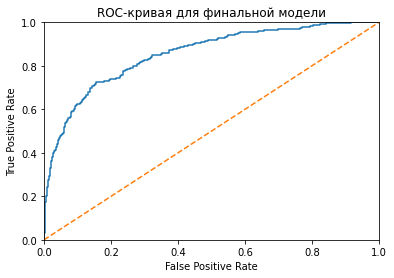

In [ ]:
probabilities_test = forest_model.predict_proba(X_test)

fpr, tpr, tresholds = roc_curve(y_test, probabilities_test[:, 1])
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая для финальной модели')
plt.show()

## Итоговый вывод
- Проведено знакомство с данными, выявлены направления преобработки для дальнейшей работы с данными.
- Проведена предобработка, включающая в себя:
    - Заполнение пропусков в столбце `Tenure`.
    - Удаление ненужных столбцов `Surname`, `CustomerId`, и `RowNumber`.
    - Прямое кодирование методом OHE.
- Данные разделены на 3 выборки: обучающую, валидационную и тестовую.
- Проведено масштабирование количественных признаков.
- Исследованы метрики трех обученных моделей (Линейная модель, Дерево решений и Случайный лес) с подобранными гиперпараметрами без учёта дисбаланса. Наилучшей на данном этапе оказалась модель Дерева решений: F1-мера = **0.592**.
- Проведена борьба с дисбалансом тремя способами (увеличение выборки, уменьшение выборки и взвешивание весов) и проверено какой из способов оказался эффективнее на выбранных типах моделей. Наиболее эффективным оказался **метод взвешенных весов**. С его помощью удалось обучить модель Случайного леса и довести F1-меру до значения в **0.62**
- Проведён подбор порога классификации, однако увеличения показателей целевой метрики достичь не удалось.
- Проведено тестирование итоговой модели и получено приемлемое значение F1-меры в **0.614**.